In [6]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
path = "./kfood"
categories = ["국", "나물", "떡", "밥", "볶음", "전", "찌개"]
num_classes = len(categories)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

x = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot encoding
    label = [0 for i in range(num_classes)]
    label[idx] = 1

    image_dir = path + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print("category name : ", cat, " file length : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        x.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

x = np.array(x)
y = np.array(y)


x_train, x_test, y_train, y_test = train_test_split(x, y)


xy = (x_train, x_test, y_train, y_test)
np.save("./kfood_image_data.npy", xy)

print("success", len(y))

category name :  국  file length :  7954
국  :  ./kfood/국\Img_014_0000.jpg
국  :  ./kfood/국\Img_014_0705.jpg
국  :  ./kfood/국\Img_015_0420.jpg
국  :  ./kfood/국\Img_016_0128.jpg
국  :  ./kfood/국\Img_016_0828.jpg
국  :  ./kfood/국\Img_017_0537.jpg
국  :  ./kfood/국\Img_018_0239.jpg
국  :  ./kfood/국\Img_018_0940.jpg
국  :  ./kfood/국\Img_019_0641.jpg
국  :  ./kfood/국\Img_020_0342.jpg
국  :  ./kfood/국\Img_021_0043.jpg
국  :  ./kfood/국\Img_021_0746.jpg
category name :  나물  file length :  4999
나물  :  ./kfood/나물\Img_040_0000.jpg
나물  :  ./kfood/나물\Img_040_0700.jpg
나물  :  ./kfood/나물\Img_041_0400.jpg
나물  :  ./kfood/나물\Img_042_0100.jpg
나물  :  ./kfood/나물\Img_042_0800.jpg
나물  :  ./kfood/나물\Img_043_0500.jpg
나물  :  ./kfood/나물\Img_044_0201.jpg
나물  :  ./kfood/나물\Img_044_0901.jpg
category name :  떡  file length :  2982
떡  :  ./kfood/떡\Img_046_0000.jpg
떡  :  ./kfood/떡\Img_046_0701.jpg
떡  :  ./kfood/떡\Img_047_0413.jpg
떡  :  ./kfood/떡\Img_048_0118.jpg
떡  :  ./kfood/떡\Img_048_0819.jpg
category name :  밥  file length :  598

29980 9994
x_train shape: (29980, 64, 64, 3)
29980 train samples


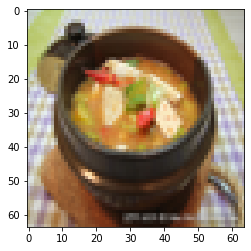

In [109]:
print(len(x_train), len(x_test)) #testset은 약 0.25의 비율로 나눠짐
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
plt.imshow(x_train[280])
plt.show()

In [56]:
import keras.backend.tensorflow_backend as K
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, ReLU, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
import os, glob, numpy as np
import sys
from six.moves import cPickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


batch_size = 32
num_classes = 7
epochs = 25
# Steps_per_epoch should typically be equal to the number of unique samples of your dataset divided by the batch size.
steps_per_epoch = int(29980/batch_size)
save_dir = os.path.join(os.getcwd(), 'saved_models')
#save_dir = os.path.join('/content/drive/My Drive/data')
model_name = 'trained_model.h5'


x_train, x_test, y_train, y_test = np.load('./kfood_image_data.npy', allow_pickle=True)
print(x_train.shape)
print(x_train.shape[0])

(29980, 64, 64, 3)
29980


In [57]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [64]:
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), padding="same", input_shape=x_train.shape[1:],activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same",  activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    


# Train
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Epoch 1/25
937/937 [==============================] - 12s 13ms/step - loss: 1.5246 - accuracy: 0.4669 - val_loss: 1.2212 - val_accuracy: 0.5679
Epoch 2/25
937/937 [==============================] - 12s 13ms/step - loss: 1.1567 - accuracy: 0.5772 - val_loss: 1.3895 - val_accuracy: 0.5294
Epoch 3/25
937/937 [==============================] - 12s 13ms/step - loss: 1.0455 - accuracy: 0.6184 - val_loss: 1.1324 - val_accuracy: 0.6298
Epoch 4/25
937/937 [==============================] - 12s 13ms/step - loss: 0.9812 - accuracy: 0.6469 - val_loss: 2.0486 - val_accuracy: 0.5468
Epoch 5/25
937/937 [==============================] - 12s 13ms/step - loss: 0.9423 - accuracy: 0.6560 - val_loss: 0.9939 - val_accuracy: 0.6418
Epoch 6/25
937/937 [==============================] - 12s 13ms/step - loss: 0.8765 - accuracy: 0.6795 - val_loss: 0.9738 - val_accuracy: 0.6709
Epoch 7/25
937/937 [==============================] - 12s 13ms/step - loss: 0.8395 - accuracy: 0.6942 - val_loss: 1.1049 - val_accuracy:

In [65]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 64)      

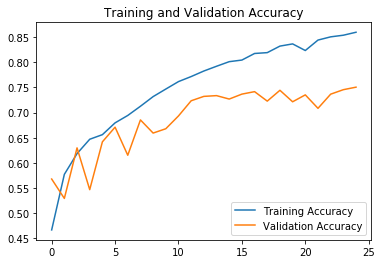

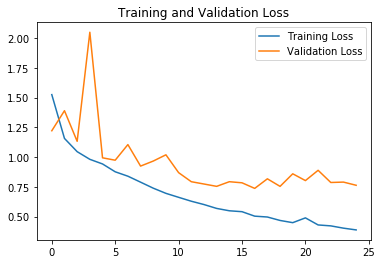

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)


plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()